## 1. EDA

### Introduction
This project is a report about the datasets from the Snapchat's advertisement‘s Library. The dataset we use has 34 columns and 4268 observations. <br>
We plan to investigate three questions in this report:
- What are the most prevalent organizations, advertisers, and ballot candidates in the data? Do you recognize any?
- What are the characteristics of ads with a large reach, i.e., many views? What may a campaign consider when maximizing an ad's reach?
- What groups or regions are targeted frequently? <br>
We also want to analyze the missingness in 'EndDate' columns, while do a hypothesis test to analyze the difference between the impressions of male-targeted and female-targeted advertisements.

### Cleaning and EDA
We first combine the two dataframes into a single one. We then converted the time to datetime form with the same time zone, and also transfrom the spend into USD form.
We defined 'Large-reach' as having a large number of Impressions. We calculate the average impression(in second) and the number of the targeted factor. We define 'prevalent' as appearing most in the dataset. By analyzing the counts and impressions, we find that though the most prevalent organizations, candidates and advertiser overweighs others in count, their average impressions are not the best in the datasets.This may indicates that those top prevalent organizations, candidates and advertisers tend to have a poor-quality advertisement.<br>
By plotting scatter plots with a best-fit line, we find that if an advertisment in the data has a higher impression, it tends to have a higher spend, more number of radius and more number of interests. We also find that in the top 25% most viewed ads, most of them are from the United States since most of the data are ads from USA. However, when comparing the average impression, France and United Arab Emirates win for a potentially better quality of ads. <br>
We also find that, Florida and Colorado are the most targeted Electoral Districts while Minnesota and Virginia becomes the most common targeted region. It is reasonable since all these regions and districts are politically active and both sides want to compete for these regions' support. Thus, more ads tend to target these regions. We also find that Green Living Enthusiasts,Political News Watchers and Advocates & Activists are the main targeted audience since they are more likely to participate the political events. Females also become the main targeted gender since more equal-rights activities are hold.

### Assessment of Missingness
As we analyzed in EDA part, we find an obvious relationship between Spend and Impressions. We also find there are many entries in columns 'EndDate' are missing. We try to find whether the missingness of end date of the advertisement depends on the Impression and Spend columns.<br>
We adopt a permutation test to verify our guess with a significance value of 5%. We first observe a huge difference between the average spend of the null group and non-null group. Then we shuffle the End Date column for 1000 times to do a permutation test. We get a p-value of 0.02, which means the missingness of end date of the advertisement is dependent on the Impressions columns. <br>
To find whether the missingness is correlated to the Spend column, we also use k-s statistic to do another permutation test with a significance value of 5%. We have a p-value which is quite close to 0. Then we reject the null hypothesis that the missingness of end date of the advertisement is random.<br>
We have a simple guess to explain this result: The advertisement which tends to recevie less views indicates that it has a poor design and plan. Thus the snapchat stops tracking its performance and its EndDate is missing.
### Hypothesis Test
We observe a difference of average Impressions between advertisements targeted to only female and advertisements targeted to only male. It seems that advertisements targeted to only male recevies 10,000 views than advertisements targeted to only female. We use a hypothesis test to see that whether this difference is by chance.<br>
Our hypothesis is <br>H0: The average impressions of  advertisements targeted to only male is equal to advertisements targeted to only female.<br> H1:The average impressions of  advertisements targeted to only male is more than advertisements targeted to only female.<br>
We use the difference of mean of each group as our test statistics and 5% as our significance level.<br>
After a 1000-shuffling test, we get a p-value of 0.65, which means that we fail to reject our null hypothesis. Thus, the difference of average Impressions between advertisements targeted to only female and  advertisements targeted to only male is by chance. However, we need to notice that those ads targeted to female much more frequently. Thus, in future research we may have to pay more attention on the confounding variables.

# Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

First of all, we combine the data together to form a dataframe containing information from both 2018 and 2019.

In [736]:
code_2018 = pd.read_csv('PoliticalAds2018.csv')
code_2019 = pd.read_csv('PoliticalAds2019.csv')
df = pd.concat([code_2018,code_2019]).reset_index()
df.head()

,index,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,0,ec8502b1458cc1f3ae6c6595f5945a02d1a40d07bd2047...,https://www.snap.com/political-ads/asset/1741e...,USD,60,15116,2018/12/01 17:37:07Z,2019/01/10 22:51:08Z,LPM,GB,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:http://jidesanwoolu.ng
1,1,cb0e9e6fad9cf28867221f5be6acf08ec3946c5a44b940...,https://www.snap.com/political-ads/asset/51615...,EUR,673,223919,2018/09/02 09:59:57Z,2018/09/15 09:59:59Z,Media Agent,"Østre alle 2 ,Værløse ,3500,DK",...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://danskfolkeparti.dk
2,2,1f1ab192aa8cf2b1cd5daee80d42eed7f089b61a7a51ee...,https://www.snap.com/political-ads/asset/f4acf...,USD,996,94458,2018/10/18 20:06:52Z,2018/11/06 23:00:00Z,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,28fc1aa27819556a773bdb3f524f6110df24eba930985d...,https://www.snap.com/political-ads/asset/fd7e9...,USD,2431,500887,2018/10/29 17:40:22Z,2018/11/04 04:00:00Z,ACRONYM,US,...,NaN,NaN,"Advocates & Activists,Basketball Fans,Bookworm...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://plan.showupto.vote/
4,4,7d48bac22fa3e1ac4d5a77d6aa4c005dabfd33eafc560c...,https://www.snap.com/political-ads/asset/8892a...,CAD,224,137147,2018/07/20 23:09:54Z,2018/09/04 03:59:00Z,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",...,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,web_view_url:https://plancanada.ca/ChangeTheBi...


We choose to drop the ADID and CreativeUrl since they are given in a relatively random way and are useless in our analysis.

In [737]:
df_cleaned=df.drop(columns=['ADID','CreativeUrl'])
df_cleaned.head()

,index,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,0,USD,60,15116,2018/12/01 17:37:07Z,2019/01/10 22:51:08Z,LPM,GB,NaN,sdm.ng,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:http://jidesanwoolu.ng
1,1,EUR,673,223919,2018/09/02 09:59:57Z,2018/09/15 09:59:59Z,Media Agent,"Østre alle 2 ,Værløse ,3500,DK",NaN,Dansk_Folkeparti,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://danskfolkeparti.dk
2,2,USD,996,94458,2018/10/18 20:06:52Z,2018/11/06 23:00:00Z,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,NextGen America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,USD,2431,500887,2018/10/29 17:40:22Z,2018/11/04 04:00:00Z,ACRONYM,US,NaN,Show Up To Vote,...,NaN,NaN,"Advocates & Activists,Basketball Fans,Bookworm...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://plan.showupto.vote/
4,4,CAD,224,137147,2018/07/20 23:09:54Z,2018/09/04 03:59:00Z,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",NaN,Plan International Canada,...,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,web_view_url:https://plancanada.ca/ChangeTheBi...


Then we uniform the currency of all the advertisments. We decide to exchange all the other currency into USD

In [738]:
#Find all the currency in the dataset
df_cleaned['Currency Code'].unique()

array(['USD', 'EUR', 'CAD', 'AUD', 'GBP'], dtype=object)

In [739]:
# Exchange All the currency to USD
currency_dict = {"USD": 1, "EUR": 1.1, "GBP": 1.25, "CAD": 0.71, "AUD": 0.64}
exchange_rate = df_cleaned['Currency Code'].replace(currency_dict)
df_cleaned['Uniform Spend'] = df_cleaned['Spend']*exchange_rate

Then we clean the data by change the time to datetime form in correct time zone.We set the all the time zone to UTC.

In [740]:
df_cleaned['StartDate']=pd.to_datetime(df_cleaned['StartDate'])
df_cleaned['EndDate']=pd.to_datetime(df_cleaned['EndDate'])
df_cleaned['StartDate']=df_cleaned['StartDate'].dt.tz_convert(None)
df_cleaned['EndDate']=df_cleaned['EndDate'].dt.tz_convert(None)

We also clean the organization,candidate and advertiser name to aviod duplicates. In order to better compare the impression of each advertisement, we calculate the average impression per second for each advertisment. We set the average impression as null if the date entries are inconsistent(StartDate is later than EndDate).

In [741]:
df_cleaned['OrganizationName']=df_cleaned['OrganizationName'].str.title().str.strip()
df_cleaned['CandidateBallotInformation']=df_cleaned['CandidateBallotInformation'].str.title().str.strip()
df_cleaned['PayingAdvertiserName']=df_cleaned['PayingAdvertiserName'].str.title().str.strip()
df_cleaned['Duration'] = df_cleaned["EndDate"] - df_cleaned["StartDate"]
df_cleaned['Duration']=df_cleaned['Duration'].dt.total_seconds()
df_cleaned['Duration'] = df_cleaned['Duration'].apply(lambda x: np.nan if x<0 else x)
df_cleaned['Average Impression']=df_cleaned['Impressions']/df_cleaned['Duration']

#### Find the Most Prevalent Organizations,advertisers, and ballot candidates in the data
For the EDA part, we first want to investigate the most prevalent organizations, advertisers, and ballot candidates in the dataset.<br>
We begin with analyze the most prevalent organizations. We found that in our data, UnRestrict Minnesota appears for 311 times, which is the most common organization, while Blueprint Interactive and The Aber Group become the second and third  most prevalent organization.

OrganizationName
Unrestrict Minnesota              311
Blueprint Interactive             248
The Aber Group                    223
Acronym                           182
Hope Not Hate Charitable Trust    173
Name: Impressions, dtype: int64

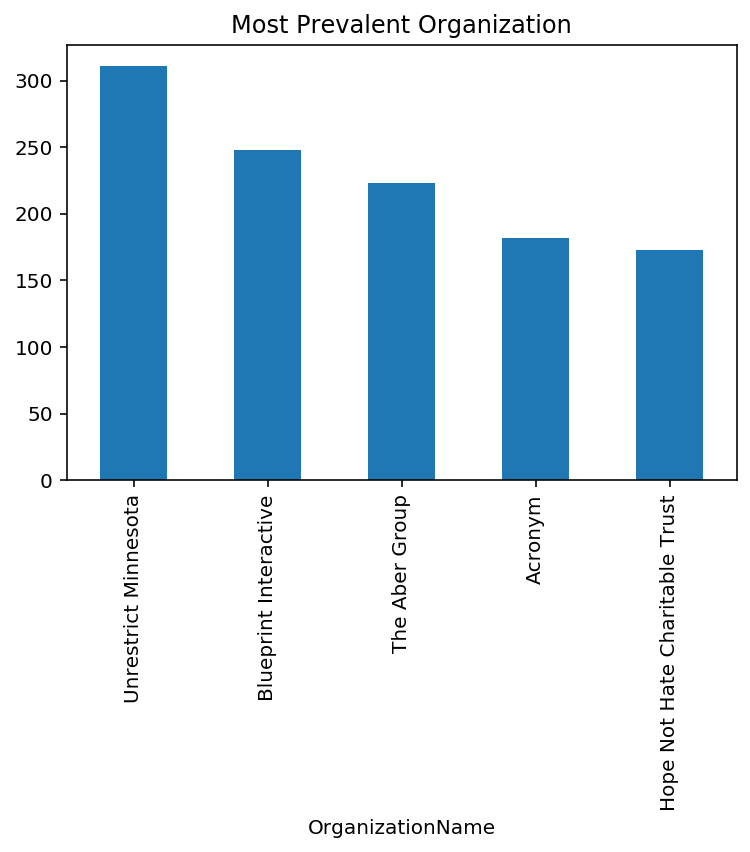

In [742]:
organization=df_cleaned.groupby('OrganizationName')['Impressions'].count().sort_values(ascending = False).head()
display(organization)
organization.plot(kind="bar", title="Most Prevalent Organization")
plt.show()

However, when we sort the average impression of all the organization, swe find that the organization with the most average views is North Face, while UnRestrict Minnesota is not even in the top five organization with the most average views. Then we can conclude that the most prevalent organizations do not have a high average impression.

In [743]:
df_cleaned.groupby('OrganizationName')['Average Impression'].mean().sort_values(ascending = False).head()

OrganizationName
The North Face                                 34.113581
Recreational Equipment Inc.                    27.027928
Australian Government Department Of Finance    14.351093
The Labour Party                               12.766081
Dentsu Aegis Network France                    12.261357
Name: Average Impression, dtype: float64

We begin with analyze the most prevalent candidate . We found that in our data, General Election appears for 121 times, while Warren For President, as an individual candidate,appears for 116 times.

CandidateBallotInformation
General Election        121
Warren For President    116
Get Out The Vote         92
Register To Vote         39
Liberal Democrats        19
Name: Impressions, dtype: int64

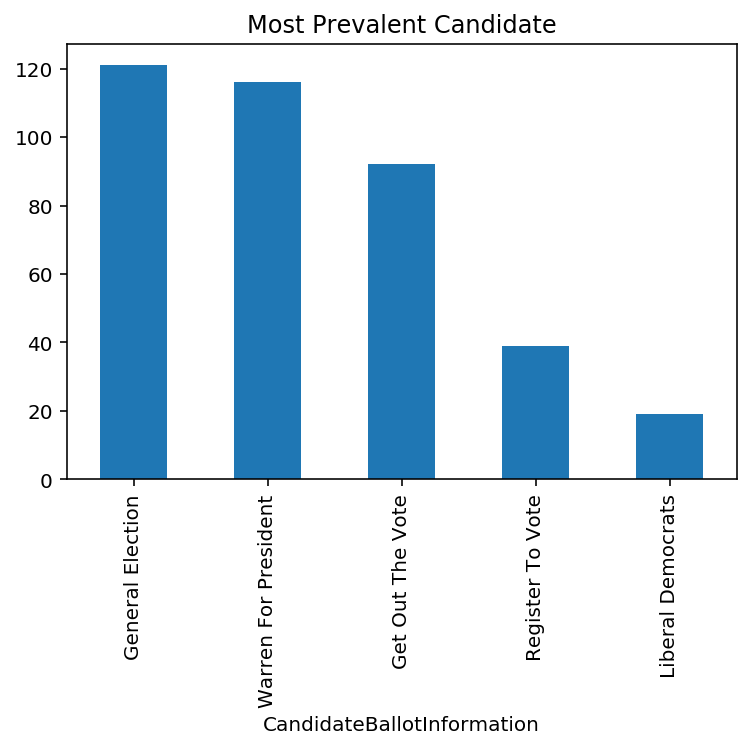

In [744]:
candidate = df_cleaned.groupby('CandidateBallotInformation')['Impressions'].count()
candidate=candidate.sort_values(ascending = False).head()
display(candidate)
candidate.plot(kind="bar", title="Most Prevalent Candidate")
plt.show()

Again, when we analyze the candidate with the most average views, the top three candidate becomes Labour Party, Mike Bloomberg and UK General Election. It indicates that the most prevalent cadidates'ads also do not have a high average impression.

In [745]:
df_cleaned.groupby('CandidateBallotInformation')['Average Impression'].mean().sort_values(ascending = False).head()

CandidateBallotInformation
The Labour Party           25.304152
Mike Bloomberg 2020 Inc    12.191920
Uk General Election         7.673708
Norbert Hofer               6.077464
Uk General Elections        5.900382
Name: Average Impression, dtype: float64

Finally we try to find the most prevalent advertiser. The top advertiser with the most occureance is Unrestrict Minnesota again,while Carat France  has the most average views. The most prevalent advertisers, as organizations and candidates, do not have a high average impression

PayingAdvertiserName
Unrestrict Minnesota              311
Plan International Canada         210
Hope Not Hate Charitable Trust    173
Warren For President              150
Acronym                           129
Name: Impressions, dtype: int64

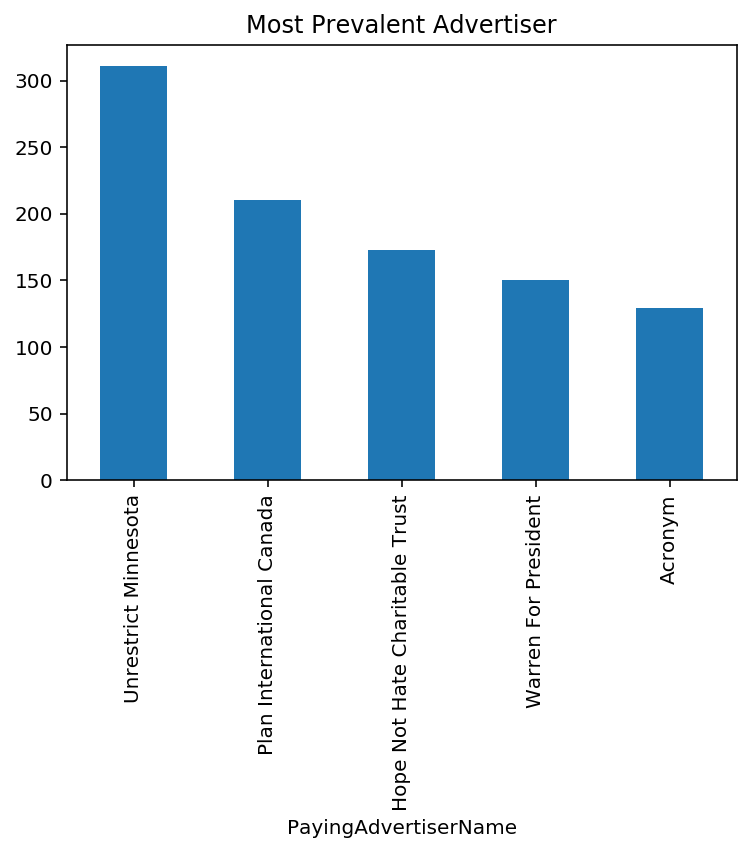

In [746]:
advertiser = df_cleaned.groupby('PayingAdvertiserName')['Impressions'].count().sort_values(ascending = False)
advertiser =advertiser.head()
display(advertiser)
advertiser.plot(kind="bar", title="Most Prevalent Advertiser")
plt.show()

In [776]:
# Advertiser with the the most average views.
df_cleaned.groupby('PayingAdvertiserName')['Average Impression'].mean().sort_values(ascending = False).head()

PayingAdvertiserName
Carat France                       106.851581
The North Face                      34.113581
Éducation Nationale                 17.407994
Australian Electoral Commission     14.351093
The Labour Party                    12.766081
Name: Average Impression, dtype: float64

<br>


#### Find the characteristics of Large-reach ads

After discussing the most prevalent organization,candidates and advertiser, now we want to know what are the characteristics of ads with a large reach, i.e., many views.<br>
We first draw a scatter plot with a best-fit line for Impressions and Duration to see if calculating average Impression is reasonable. We see from the plot that there is a positive relationship between Impressions and Durations, though quite weak. Thus, it is resonable for us to calculate the average Impressions to reduce the impact of duration when analyzing other variables.

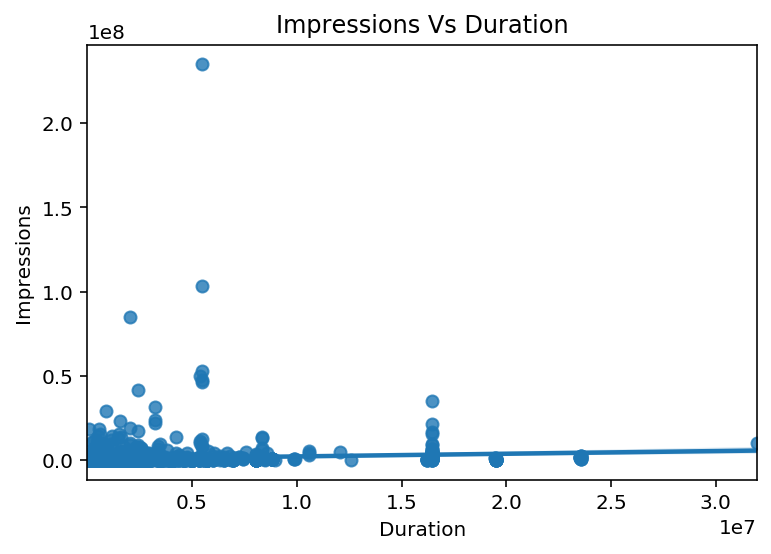

In [748]:
plot = sns.regplot(df_cleaned['Duration'],df_cleaned['Impressions'])
plot.set_title("Impressions Vs Duration")
plt.show()

We then draw a scatter plot of Impressions and Spend with a best-fit line. With this overall plot, We can see that there is a obvious positive pattern, which means these two variable are quite likely to be related. Then in order to eliminate the possible effect caused by duration, we draw a scatter plot of average impressions and Spend with a best-fit line.
From this plot, we still see a strong positve relationship between the two variable.Thus, we can conclude that advertisment that has a large reach tends to have a higher spend.

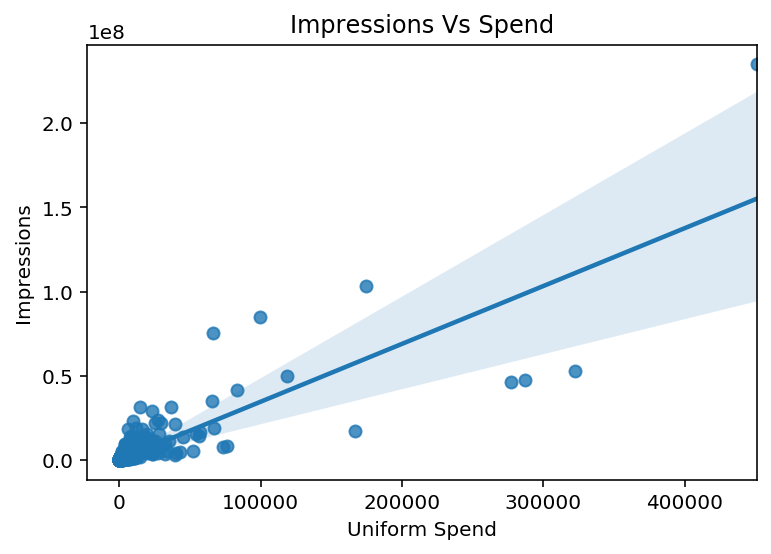

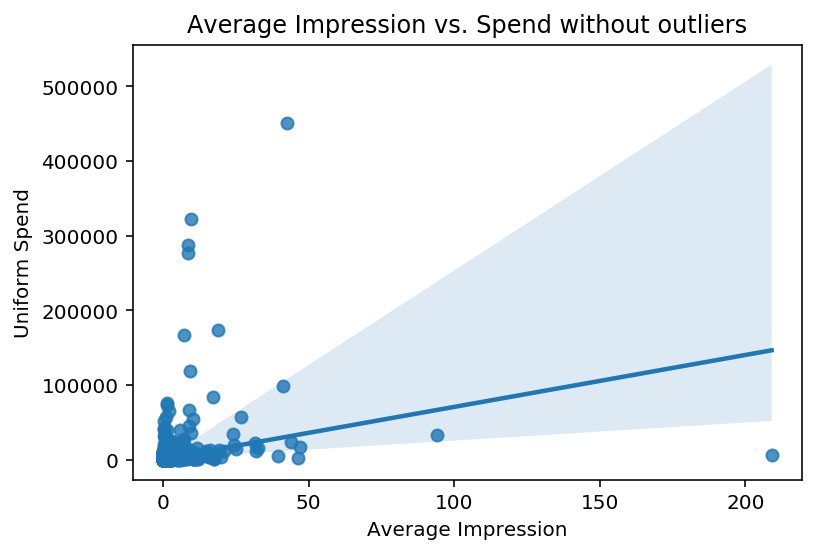

In [749]:
plot = sns.regplot(df_cleaned['Uniform Spend'],df_cleaned['Impressions'])
plot.set_title("Impressions Vs Spend")
plt.show()

sns.regplot(data=df_cleaned, x="Average Impression",
            y="Uniform Spend").set_title("Average Impression vs. Spend without outliers")
plt.show()

We also want to know whether other variables are also related to the average impressions. We investigate the number of interest, number of the radius and number of the language targeted. We find that the number of radius and interest are weakly related to average impressions in a postive direction, while the num of language has no effect. Then we can conclude that advertisement which has a large-reach tends to have a higher number of targeted interest and radius.

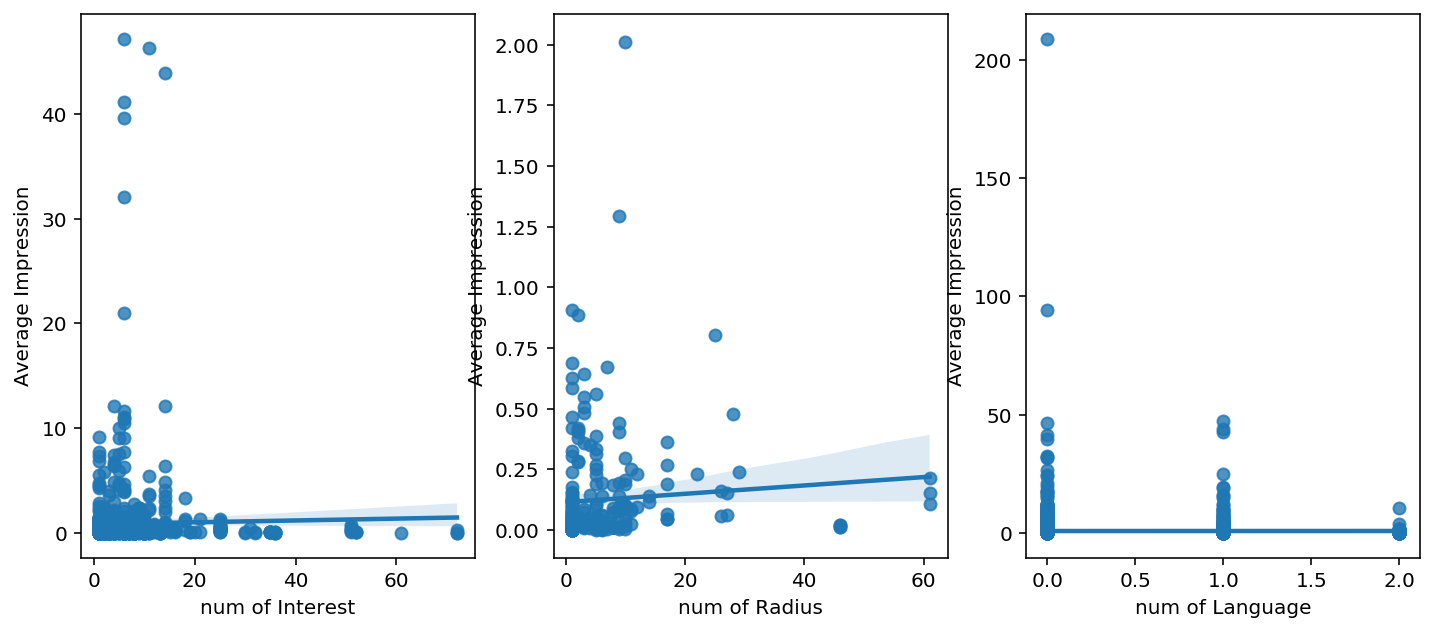

In [750]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))
df_cleaned['num of Radius'] = df_cleaned["Radius Targeting (Included)"].str.count("radius")
df_cleaned['num of Interest'] = df_cleaned["Interests"].str.count(",") + 1
sns.regplot(df_cleaned['num of Interest'],df_cleaned['Average Impression'], ax=axes[0])
sns.regplot(df_cleaned['num of Radius'],df_cleaned['Average Impression'], ax=axes[1])
df_cleaned['num of Language']=df_cleaned["Language"].str.count(",") + 1
df_cleaned['num of Language']=df_cleaned['num of Language'].replace({np.nan:0})
sns.regplot(df_cleaned['num of Language'],df_cleaned['Average Impression'], ax=axes[2])
plt.show()



Then we define the top 25% as large-reach group we want to focus.Then for the top 25% countries with the most impressions, we find that most of them come from the United States.

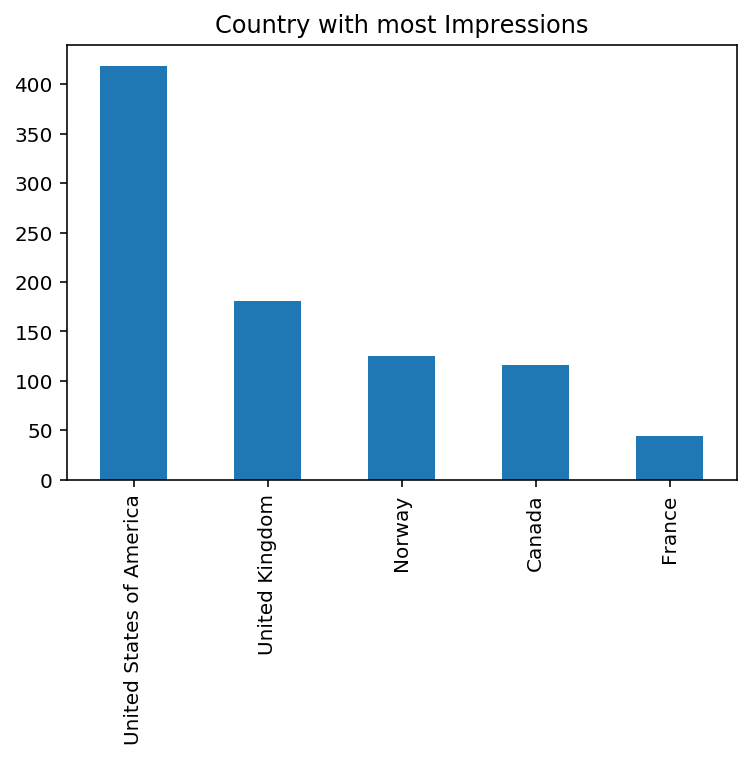

In [751]:
df_cleaned['CountryCode']=df_cleaned['CountryCode'].str.title()
df_cleaned['CountryCode'] =df_cleaned['CountryCode'].replace({'United States':'United States of America',
                                                               'United Kingdom':'United Kingdom'})
percent_25 = df_cleaned.sort_values('Average Impression',ascending = False).iloc[:(int)(df_cleaned.shape[0]*0.25)]
top_country = percent_25['CountryCode'].value_counts().head()
top_country.plot(kind="bar", title="Country with most Impressions")
plt.show()

However, it changes a bit when we analyze the mean of average impressions of each country. We find that France and United Arab Emirates has the higher average Impression,which means they have a better quality of advertisments.

In [752]:
df_country = df_cleaned.groupby('CountryCode')['Average Impression'].mean().to_frame().reset_index()
df_country=df_country.sort_values('Average Impression',ascending = False)
df_country.head()

,CountryCode,Average Impression
9,France,6.804141
26,United Arab Emirates,5.561396
1,Australia,2.081970
10,Germany,1.541802
27,United Kingdom,1.448720


####  Which group is targeted most by the advertisement

We first search for the most targeted Electoral Districts. It shows that Colorado and Florida become the  most targeted Electoral Districts.

In [755]:
all_electoral_dist = df_cleaned["Electoral Districts (Included)"].dropna().str.split(",").sum()
pd.Series(all_electoral_dist).value_counts().head()

Colorado 6th District    21
Colorado 1st District    21
Colorado 2nd District    21
Florida 26th District    21
Florida 27th District    21
dtype: int64

Then we find that Minnesota and Virginia become the  most targeted Regions. Our first two findings are quite reasonable because Florida, Colorado and Virginia are some neutral states in elections that both sides want to get more vote from these states, so more advertising are taken.

In [756]:
all_regions = df_cleaned["Regions (Included)"].dropna().str.split(",").sum()
region_count = len(set(all_regions))
pd.Series(all_regions).value_counts().head()

Minnesota    334
Virginia     104
Colorado      86
Arizona       76
Georgia       76
dtype: int64

We combine the minority of targeted language together, and we find that the most targeted language is English.It takes up nearly 70% since most countries the data includes are English-speaking countries.

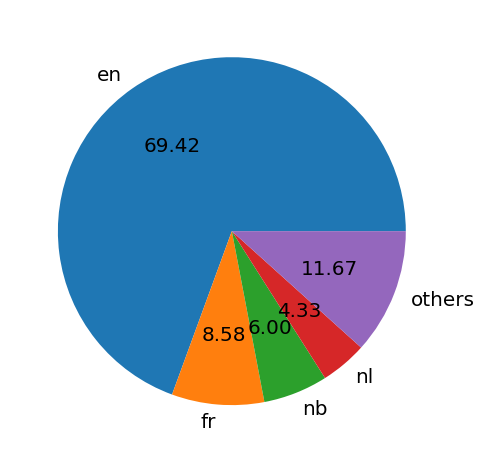

In [757]:
lan = pd.Series(df_cleaned["Language"].str.split(",").dropna().sum()).value_counts()
others = pd.Series(lan[4:].sum(),index = ['others'])
lan = lan[0:4].append(others)
plt.pie(lan,labels=lan.index, autopct='%1.2f')
plt.show()


Then we find that in single-gender targeted data, most advertisments choose to focus on female audiences. We make a guess that since nowadays more equal-right activities are being hold and female voters become a really strong force during the election.

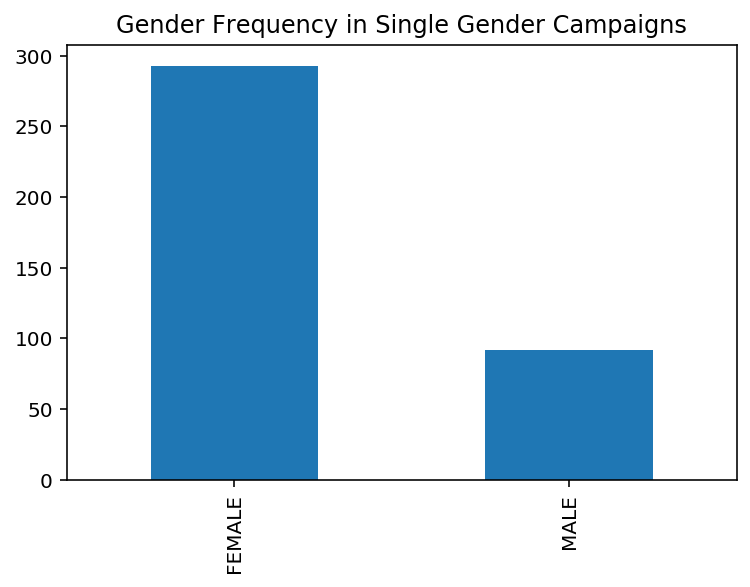

In [758]:
gender_count = df_cleaned.dropna(subset=["Gender"])['Gender'].value_counts()
gender_count.plot(kind="bar", title="Gender Frequency in Single Gender Campaigns")
plt.show()

We also see that for advertisments in different spending range, more advertisements choose to focus on female target no matter what spend range they are in.

In [759]:
spend_range = df_cleaned.assign(spend_range = pd.qcut(df_cleaned['Uniform Spend'],5))
spend_range['Gender'] = spend_range['Gender'].replace(np.nan,'ALL')
gender_spend = spend_range.pivot_table(columns= 'Gender',index = 'spend_range',
                                       values= 'Impressions', aggfunc = 'count')
display(gender_spend)

Gender,ALL,FEMALE,MALE
spend_range,,,
"(-0.001, 27.5]",813,27,14
"(27.5, 113.0]",800,54,4
"(113.0, 344.2]",744,74,31
"(344.2, 987.44]",742,83,28
"(987.44, 451244.0]",784,55,15


Then we find that Green Living Enthusiasts, Political News Watchers and Advocates & Activists are the most targeted interest of all the advertisment. These three kinds of people are the ones who engage the political events frequently and the main participants in the election.

In [760]:
interests = df_cleaned["Interests"].dropna().str.split(",").sum()
interest_count = len(set(interests))
pd.Series(all_interests).value_counts().head()

Green Living Enthusiasts    350
Political News Watchers     343
Advocates & Activists       317
Hipsters & Trendsetters     265
Philanthropists             261
dtype: int64

### Assessment of Missingness

As we analyzed in EDA part, we find an obvious relationship between Spend and Impressions. We also find there are many entries in columns 'EndDate' are missing(about 777 rows in the dataset). We try to find whether the missingness of end date of the advertisement is depend on the Impressions columns

In [761]:
# The number of missingness in this columns
pd.isna(df_cleaned['EndDate']).sum()

777

In [762]:
#We first labelwhether the entry is null
end_null = df_cleaned.assign(end_isnull = pd.isna(df_cleaned.EndDate))


In [763]:
#We observe a huge difference between null and non-null group in spending
observation = end_null.groupby('end_isnull')['Impressions'].mean().diff().abs().iloc[-1]
observation

432460.4384851357

In [764]:
#Shuffle for 1000 times and get the p-value
means=[]
for _ in range(1000):
    shuffled_col = end_null['end_isnull'].sample(replace=False, frac=1).reset_index(drop=True)
    shuffled = end_null.assign(**{'data': shuffled_col,})
    mean = shuffled.groupby('data')['Impressions'].mean().diff().abs().iloc[-1]
    means.append(mean)

pval_mean = np.mean(means > observation)
pval_mean

0.028

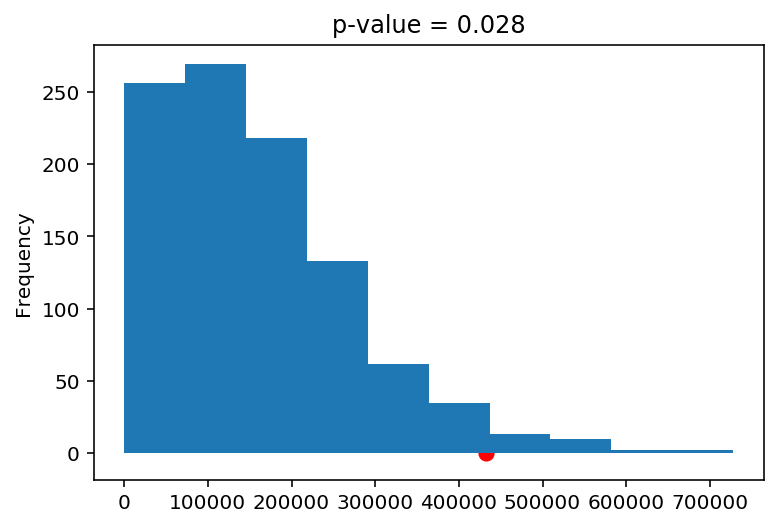

In [765]:
# We plot the p-value, which reject our null hypothesis
pd.Series(means).plot(kind="hist")
plt.scatter(observation, 0, s=50, c="r")
plt.title("p-value = " + str(pval_mean))
plt.show()

 We also try to find whether the missingness of end date of the advertisement is depend on the Spend columns since we have proved the Spend column and Impressions column are related.

In [766]:
#Calculate the k-s statistic between null and non-null group
from scipy.stats import ks_2samp
gpA = end_null.loc[end_null.end_isnull == True, 'Uniform Spend']
gpB =end_null.loc[end_null.end_isnull== False, 'Uniform Spend']
obs = ks_2samp(gpA, gpB).statistic
obs

0.2724365319610235

In [767]:
#Shuffle for 500 times and get the p-value
ks_list = []
for _ in range(500):
    shuffled_col = end_null.EndDate.sample(replace=False, frac=1).reset_index(drop=True)
    shuffled = end_null.assign(**{'data': shuffled_col,})
    gpA = shuffled.loc[pd.isna(shuffled.data) == True, 'Uniform Spend']
    gpB = shuffled.loc[pd.isna(shuffled.data)== False, 'Uniform Spend']
    ks = ks_2samp(gpA, gpB).statistic
    ks_list.append(ks)
pval_ks = np.mean(np.array(ks_list) > obs)
pval_ks

0.0

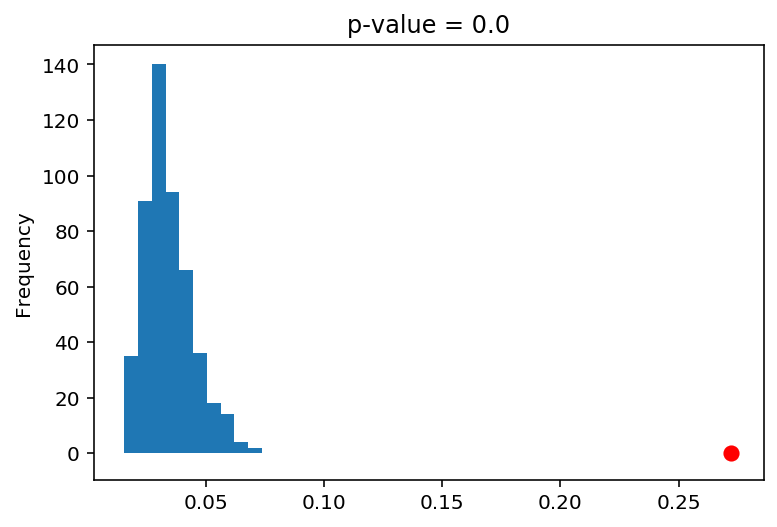

In [768]:
# We plot the p-value, which reject our null hypothesis
pd.Series(ks_list).plot(kind="hist")
plt.scatter(obs, 0, s=50, c="r")
plt.title("p-value = " + str(pval_ks))
plt.show()

### Hypothesis Test

In the EDA part, we noticed that the proportion of female-targeted advertisements is quite high in singe-gender-targeted ads. However, we also observed that male-targeted advertisements have a higher impression than female-targeted. We then adopted a hypothesis test to test whether the difference is by chance.

In [769]:
#We first drop null values
gender_cleaned = df_cleaned.dropna(subset=['Gender'])
gender_cleaned.groupby('Gender')['Impressions'].count()

Gender
FEMALE    293
MALE       92
Name: Impressions, dtype: int64

In [770]:
#calculate the observed difference
observed = gender_cleaned.groupby('Gender')['Impressions'].mean()
observed

Gender
FEMALE    353398.225256
MALE      457353.847826
Name: Impressions, dtype: float64

In [771]:
observation = observed.diff().abs().iloc[-1]
observation

103955.62257011427

In [772]:
#We shuffle for 1000 times and get the p-value
means=[]
for _ in range(1000):
    shuffled_col = gender_cleaned['Impressions'].sample(replace=False, frac=1).reset_index(drop=True)
    shuffled = end_null.assign(**{'data': shuffled_col,})
    mean = shuffled.groupby('data')['Impressions'].mean().diff().abs().iloc[-1]
    means.append(mean)

pval = np.mean(means > observation)
pval

0.624

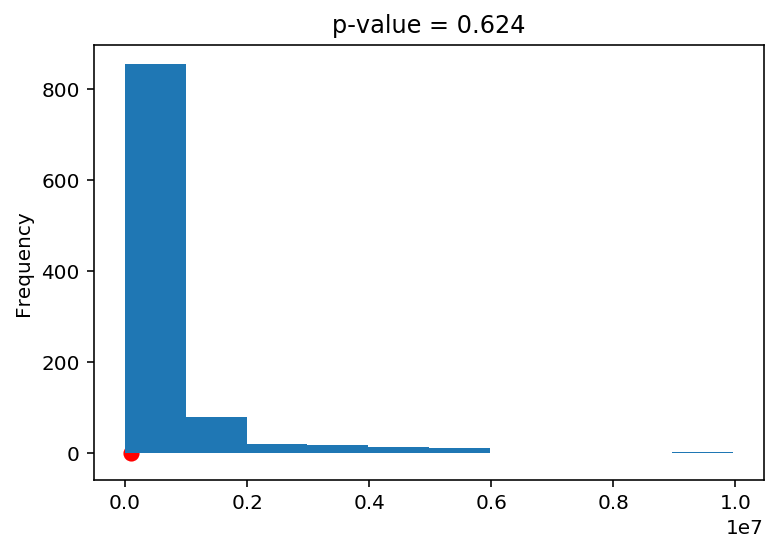

In [773]:
# We plot the p-value, which fail to reject our null hypothesis
pd.Series(means).plot(kind="hist")
plt.scatter(observation, 0, s=50, c="r")
plt.title("p-value = " + str(pval))
plt.show()

## 2. Features Engineering


### Introduction

In this part, we plan to predict the target gender using the other variables in the dataset. Specifically, we want to predict whether the advertisement is targeting to a single gender or is targeting to all genders using classification. We choose to predict the gender type because we notice that large difference are presented in some quantitative variables for single-gender targeted ads and all-gender targeted ads, espectially for the mean of 'spend' and 'impressions' columns. We want to see if the difference present in other columns in order to make the prediction. <br>
This prediction problem should be a classification problem, we set 0 for all-gender targeted advertisement and 1 for single-gender targeted advertisement, and try to classify the advertisement to one of the category. <br>
To evaluate our method, we use metrics to see the overall performance including f1 score of each group to see whether the model predict well for both groups. We also introduce the classification_report to analyze the prediction power and keep an eye on the accuracy (the precision score) to make sure that the precision of our model does not change much while improving the f1 score.

### Baseline Model
In our baseline model, we drop the variables 'StartDate', EndDate', and all the variables with more than 90% null values. We understand that it's hard to munipulate time and the time will not contribute much in our classfication, also we only want to use the columns that are representative and with enough information. <br>
Finally, we use 12 nominal features, 'Currency Code','CountryCode','Segments','Interests', 'Regions (Included)','Language','PayingAdvertiserName','BillingAddress','OrganizationName','CandidateBallotInformation','Postal Codes (Included)','AgeBracket', and 2 quantitative features, 'Spend', 'Impressions' to make the prediction. <br>
We then use ColumnTransformer to first transform the categorical variables using OneHotEncoder. Then we use a RandomForestClassifer to do the calssification since it has a higher precision in the classification models. We split our data to train set and test set to check the performance of our model.<br>
Our model performs pretty good with accuracy_score of 0.96. This score means majority of the advertisement had been predicted correctly. However,though the model is highly accurate in predicting ads targeting both gender, it tends to wrongly predict ads targeting a single gender. The precision when predict ads targeting a single gender is only 0.88, while the f1 score of advertisment targeting single gender is only 0.8.This is far below than the precision score and f1 score of the ads targeting to both genders, which are 0.97 and 0.98 respectively. The difference between the score of two groups meaning that we should improve our model to find a balance.

### Final Model
Based on our baseline model, we do some feature engineering:
- we first change the 'AgeBracket' feature into ordinal feature by grouping the age range into 6 number: 0-all, 1-'young+mid', 2-'mid',3-'young', 4-'mid+old',5-'old'. We believe by reducing the number of groups and change it into a ordianl feature will increase the predictiong power. 
- Also, besides using the "Interests","Postal Codes (Included)","Regions (Included)" columns as categorigal variables, we use them in quantitative feature. We process them into the number of appeared different interestes, postal code, and regions respectively in order to know how specific the ads's targets are.
- We calculate Uniform Spending by transform the Spending to same currency. This transformation helps us better capture the characteristic of spending on ads.
- We also include the Duration, which caculate by find the difference between Start date and End date, to better show the effect of time. Thus, our new model has 3 quantitative features, 1 ordinal feature, and 11 nomial features.
- Since other categorical columns are somtimes related,we introduce PCA to better eliminate the impact between features after onehotencoding the categorical columns. <br>
Then we repeat the same steps to build the pipeline, use the same classifier and split our data to check the performance as the baseline model .
The final model has an accuracy over 97%, while improving the performance when predicting single-gender-targeted advertisemnt with a precision score of 95%。
For selecting parameters,we adopt GridSearchCV with 5-fold cross validation to select the best parameter. We test on 'RFC__max_depth' and 'RFC__max_leaf_nodes. By comparing several different parameter, our decision is the default parameter "None", and gives us a final score of 0.97. Thus, we keep this model as our final model. Though there is still a small difference, the f1-scores for ads targeting single-gender and both are 88% and 98%, which is more reasonable and balanced than 80% and 98% in the baseline model. In conclusion, we successfully improved our model though there are still difference between two groups' scores. If we can have more data of ads targeting to singer gender, our model could be more accurate.

### Fairness Evaluation
We will choose the Spending as the subset and explore whether the final model is fairer for ads targeting a cheap/expensive advertisement. With the Uniform Spending feature we created for the final model, we will use median spending as the threshold, deeming spending less than median as cheap and higher than median as expensive. <br>
Then we perform a permutation test. We will use the absolute difference between the accuracy score of cheap advertisement and expensive advertisement and our significance level is 0.05
- H0: The final model is fair in predicting ads targeting wide or narrow age range. The accuracy score for advertisement with different spending is roughly the same.
- H1:  The final model is unfair in predicting ads targeting wide or narrow age range. The accuracy score for cheap ads is higher than that of expensive ads

We create the column "is_expensive" with the Uniform Spending column. After a 500-shuffling test, we get a p-value of 0.78 for accuracy test. Thus, we will not reject the null hypothesis and conclude that the model is likely to be fair in treating ads with different spending.

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import metrics 
from sklearn.metrics import classification_report

### Clean and EDA
First, we combine the two dataset.

In [295]:
code_2018 = pd.read_csv('PoliticalAds2018.csv')
code_2019 = pd.read_csv('PoliticalAds2019.csv')
df = pd.concat([code_2018,code_2019])
df.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,ec8502b1458cc1f3ae6c6595f5945a02d1a40d07bd2047...,https://www.snap.com/political-ads/asset/1741e...,USD,60,15116,2018/12/01 17:37:07Z,2019/01/10 22:51:08Z,LPM,GB,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:http://jidesanwoolu.ng
1,cb0e9e6fad9cf28867221f5be6acf08ec3946c5a44b940...,https://www.snap.com/political-ads/asset/51615...,EUR,673,223919,2018/09/02 09:59:57Z,2018/09/15 09:59:59Z,Media Agent,"Østre alle 2 ,Værløse ,3500,DK",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://danskfolkeparti.dk
2,1f1ab192aa8cf2b1cd5daee80d42eed7f089b61a7a51ee...,https://www.snap.com/political-ads/asset/f4acf...,USD,996,94458,2018/10/18 20:06:52Z,2018/11/06 23:00:00Z,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28fc1aa27819556a773bdb3f524f6110df24eba930985d...,https://www.snap.com/political-ads/asset/fd7e9...,USD,2431,500887,2018/10/29 17:40:22Z,2018/11/04 04:00:00Z,ACRONYM,US,NaN,...,NaN,NaN,"Advocates & Activists,Basketball Fans,Bookworm...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://plan.showupto.vote/
4,7d48bac22fa3e1ac4d5a77d6aa4c005dabfd33eafc560c...,https://www.snap.com/political-ads/asset/8892a...,CAD,224,137147,2018/07/20 23:09:54Z,2018/09/04 03:59:00Z,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",NaN,...,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,web_view_url:https://plancanada.ca/ChangeTheBi...


Then we drop the unuseful columns and change the time columns. We also grouped the gender column to two groups: 0 for all-gender targeted and 1 for single-gender targeted

In [296]:
#drop useless columns and calculate time
df_cleaned=df.drop(columns=['ADID','CreativeUrl','CreativeProperties'])
df_cleaned['StartDate']=pd.to_datetime(df_cleaned['StartDate'])
df_cleaned['EndDate']=pd.to_datetime(df_cleaned['EndDate'])
df_cleaned['StartDate']=df_cleaned['StartDate'].dt.tz_convert(None)
df_cleaned['EndDate']=df_cleaned['EndDate'].dt.tz_convert(None)
df_cleaned['Duration'] = df_cleaned["EndDate"] - df_cleaned["StartDate"]
df_cleaned['Duration']=df_cleaned['Duration'].dt.total_seconds()
df_cleaned['Duration'] = df_cleaned['Duration'].apply(lambda x: np.nan if x<0 else x)
df_cleaned=df_cleaned.dropna(subset=['Duration'])


In [297]:
# Clean names
currency_dict = {"USD": 1, "EUR": 1.1, "GBP": 1.25, "CAD": 0.71, "AUD": 0.64}
exchange_rate = df_cleaned['Currency Code'].replace(currency_dict)
df_cleaned['Uniform Spend'] = df_cleaned['Spend']*exchange_rate
df_cleaned['OrganizationName']=df_cleaned['OrganizationName'].str.title().str.strip()
df_cleaned['CandidateBallotInformation']=df_cleaned['CandidateBallotInformation'].str.title().str.strip()
df_cleaned['PayingAdvertiserName']=df_cleaned['PayingAdvertiserName'].str.title().str.strip()
df_cleaned['Gender']=df_cleaned['Gender'].str.lower()


In [298]:
df_cleaned.head()

,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,Gender,...,Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),Duration,Uniform Spend
0,USD,60,15116,2018-12-01 17:37:07,2019-01-10 22:51:08,Lpm,GB,NaN,Sdm.Ng,NaN,...,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,3474841.0,60.00
1,EUR,673,223919,2018-09-02 09:59:57,2018-09-15 09:59:59,Media Agent,"Østre alle 2 ,Værløse ,3500,DK",NaN,Dansk_Folkeparti,NaN,...,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,1123202.0,740.30
2,USD,996,94458,2018-10-18 20:06:52,2018-11-06 23:00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,Nextgen America,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1651988.0,996.00
3,USD,2431,500887,2018-10-29 17:40:22,2018-11-04 04:00:00,Acronym,US,NaN,Show Up To Vote,female,...,NaN,"Advocates & Activists,Basketball Fans,Bookworm...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,469178.0,2431.00
4,CAD,224,137147,2018-07-20 23:09:54,2018-09-04 03:59:00,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",NaN,Plan International Canada,NaN,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,3905346.0,159.04


In [299]:
df_cleaned.columns

Index(['Currency Code', 'Spend', 'Impressions', 'StartDate', 'EndDate',
       'OrganizationName', 'BillingAddress', 'CandidateBallotInformation',
       'PayingAdvertiserName', 'Gender', 'AgeBracket', 'CountryCode',
       'Regions (Included)', 'Regions (Excluded)',
       'Electoral Districts (Included)', 'Electoral Districts (Excluded)',
       'Radius Targeting (Included)', 'Radius Targeting (Excluded)',
       'Metros (Included)', 'Metros (Excluded)', 'Postal Codes (Included)',
       'Postal Codes (Excluded)', 'Location Categories (Included)',
       'Location Categories (Excluded)', 'Interests', 'OsType', 'Segments',
       'Language', 'AdvancedDemographics', 'Targeting Connection Type',
       'Targeting Carrier (ISP)', 'Duration', 'Uniform Spend'],
      dtype='object')

For variable about location the variable e only consider variable with'Included'since most of entries of the 'Exclueded'variable are null. We also drop the columns with most null values in it.

In [300]:
(pd.isna(df_cleaned).sum(axis=0)/df.shape[0]).sort_values()

Currency Code                     0.000000
Duration                          0.000000
CountryCode                       0.000000
PayingAdvertiserName              0.000000
BillingAddress                    0.000000
Uniform Spend                     0.000000
EndDate                           0.000000
StartDate                         0.000000
Impressions                       0.000000
Spend                             0.000000
OrganizationName                  0.000000
AgeBracket                        0.067948
Segments                          0.199391
Language                          0.588566
Interests                         0.598875
Regions (Included)                0.622306
Postal Codes (Included)           0.631443
CandidateBallotInformation        0.681350
Gender                            0.723758
Radius Targeting (Included)       0.755155
Metros (Included)                 0.771087
AdvancedDemographics              0.789363
Electoral Districts (Included)    0.796392
Postal Code

In [301]:
# remove columns with above 90% null value
df_cleaned =df_cleaned.drop(columns=['Radius Targeting (Included)','Metros (Included)','Postal Codes (Excluded)',
                                    'AdvancedDemographics','Electoral Districts (Included)','Regions (Excluded)',
                                    'OsType','Metros (Excluded)','Location Categories (Included)',
                                    'Radius Targeting (Excluded)' ,'Location Categories (Excluded)',
                                    'Targeting Carrier (ISP)', 'Targeting Connection Type' ,
                                    'Electoral Districts (Excluded)'])

In [302]:
df_cleaned=df_cleaned.fillna('all')
df_cleaned['Gender']=df_cleaned['Gender'].apply(lambda x: 0 if x=='all' else 1)

### Baseline Model

We first create a columntransformer to convert categorical variables to onehotcode form. 

In [303]:
pl_one_hot = Pipeline(steps=[("onehot Encode", OneHotEncoder(sparse=False,handle_unknown='ignore'))])
one_hot_col =['Currency Code','CountryCode','Segments','Interests', 'Regions (Included)','Language',
             'PayingAdvertiserName','BillingAddress','OrganizationName','CandidateBallotInformation',
              'Postal Codes (Included)','AgeBracket'] 
column_trans = ColumnTransformer(
      [("col_one",pl_one_hot, one_hot_col)], remainder = 'passthrough')


In [304]:
df_cleaned.head()

,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,Gender,AgeBracket,CountryCode,Regions (Included),Postal Codes (Included),Interests,Segments,Language,Duration,Uniform Spend
0,USD,60,15116,2018-12-01 17:37:07,2019-01-10 22:51:08,Lpm,GB,all,Sdm.Ng,0,29+,nigeria,Lagos,all,all,Provided by Advertiser,all,3474841.0,60.00
1,EUR,673,223919,2018-09-02 09:59:57,2018-09-15 09:59:59,Media Agent,"Østre alle 2 ,Værløse ,3500,DK",all,Dansk_Folkeparti,0,17+,denmark,all,all,all,Provided by Advertiser,all,1123202.0,740.30
2,USD,996,94458,2018-10-18 20:06:52,2018-11-06 23:00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",all,Nextgen America,0,18-34,united states,all,"19007,19054,18960,18966,19002,18969,18976,1915...",all,all,all,1651988.0,996.00
3,USD,2431,500887,2018-10-29 17:40:22,2018-11-04 04:00:00,Acronym,US,all,Show Up To Vote,1,18+,united states,"Florida,Michigan,Minnesota,Georgia,Wisconsin,P...",all,"Advocates & Activists,Basketball Fans,Bookworm...",Provided by Advertiser,all,469178.0,2431.00
4,CAD,224,137147,2018-07-20 23:09:54,2018-09-04 03:59:00,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",all,Plan International Canada,0,all,canada,all,all,all,all,en,3905346.0,159.04


We create a pipline by using columntransformer and RandomForestClassifier.

In [305]:
X = df_cleaned.drop(columns=['Gender','StartDate','EndDate','Duration'])
y =  df_cleaned['Gender']
pl = Pipeline([('column', column_trans),('RFC', RandomForestClassifier())])
train_X, test_X, train_y, test_y = train_test_split(X,y)
pl.fit(train_X,train_y)

Pipeline(memory=None,
         steps=[('column',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('col_one',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot '
                                                                   'Encode',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                               

In [306]:
preds=pl.predict(test_X)

We get a model with 96% overall accuracy 

In [307]:
metrics.accuracy_score(test_y, preds)

0.9618937644341802

However, the recall_score for single gender in this model is not high enough, while the recall-score for all gender in this model is ideal. 

In [308]:
metrics.recall_score(test_y, preds)

0.7362637362637363

In [309]:
metrics.recall_score(test_y,preds, pos_label=0)

0.9883870967741936

It is also important to note that the importances of the features we used is not large enough.

In [310]:
dict(zip(X.columns, pl['RFC'].feature_importances_))

{'Currency Code': 0.0001091705715065244,
 'Spend': 0.006129835976434821,
 'Impressions': 0.0017423242301077032,
 'OrganizationName': 0.0018103604040777268,
 'BillingAddress': 0.003637720721487741,
 'CandidateBallotInformation': 5.369000364873299e-07,
 'PayingAdvertiserName': 0.00031355639134108583,
 'AgeBracket': 4.262128770716931e-05,
 'CountryCode': 1.0212738794172552e-05,
 'Regions (Included)': 1.9944997264316656e-06,
 'Postal Codes (Included)': 0.007625051167466364,
 'Interests': 5.0505709226202755e-05,
 'Segments': 0.00803481696364358,
 'Language': 0.0001954795983572396,
 'Uniform Spend': 0.00019416501850817022}

Following shows the performance detail of the model. We see that when predicting single-gender-targeted advertisment, our model tends to more wrongly than predicting the all-targeted advertisment.

In [311]:
print(classification_report(test_y, preds, target_names=["Both", "Single"]))

              precision    recall  f1-score   support

        Both       0.97      0.99      0.98       775
      Single       0.88      0.74      0.80        91

    accuracy                           0.96       866
   macro avg       0.93      0.86      0.89       866
weighted avg       0.96      0.96      0.96       866



### Final Model

We change the age column to 6 groups: 0-all, 1-'young+mid', 2-'mid',3-'young', 4-'mid+old',5-'old'

In [155]:
def age_tran(x):
    if pd.isna(x):
        return 0
    if '+' in x :
        if int(x[:2])>20:
            return 1
        else:
            return 0
    elif '-' in x:
        if x[-1]!='-':
            if int(x[:2])>20 and int(x[-2:])<35:
                return 2
            elif int(x[-2:])<20:
                return 3
            elif int(x[-2:])>35:
                return 4
            else:
                return 0
        else:
            if int(x[:2])>20:
                return 5
            else:
                return 3
    else:
        return 0
        

We also calculate the number of Interest, Postal Codes and regions targeted. We also include Duration this time

In [156]:
def number_trans(df_cleaned):
    df_cleaned["Interests"] = df_cleaned["Interests"].str.count(",") + 1
    df_cleaned["Postal Codes (Included)"] = df_cleaned["Postal Codes (Included)"].str.count(",") + 1
    df_cleaned['Regions (Included)'] = df_cleaned["Regions (Included)"].str.count(",") + 1
    return df_cleaned

We also introduce PCA to eliminate the possible correlation between each variable, and then build the pipeline with the same step as the baseline model.

In [157]:
pl_one_hot = Pipeline(steps=[("onehot Encode", OneHotEncoder(sparse=False,handle_unknown='ignore'))])
one_hot_col =['Currency Code','CountryCode','Segments','Language', "Interests","Postal Codes (Included)"
              ,"Regions (Included)",'PayingAdvertiserName','BillingAddress','OrganizationName','CandidateBallotInformation'] 
column_trans = ColumnTransformer(
      [("col_one",pl_one_hot, one_hot_col),
       ("age_trans",FunctionTransformer(lambda x: x['AgeBracket'].apply(age_tran).to_frame()), ['AgeBracket']),
       ("num_trans",FunctionTransformer(number_trans), ["Interests","Postal Codes (Included)","Regions (Included)"])],
    remainder = 'passthrough')

In [232]:
X = df_cleaned.drop(columns=['Gender','StartDate','EndDate'])
y =  df_cleaned['Gender']
pl_improved = Pipeline([('column', column_trans),("pca", PCA(svd_solver="full")), ('RFC', RandomForestClassifier())])
train_X, test_X, train_y, test_y = train_test_split(X,y)
pl_improved.fit(train_X,train_y)


Pipeline(memory=None,
         steps=[('column',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('col_one',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot '
                                                                   'Encode',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                               

The importances of the features do not change substantially.

In [159]:
dict(zip(X.columns, pl_improved['RFC'].feature_importances_))

{'Currency Code': 0.0014725156040416457,
 'Spend': 0.008497995177462496,
 'Impressions': 0.0024971579752825846,
 'OrganizationName': 0.00445643970517963,
 'BillingAddress': 0.002806546134244866,
 'CandidateBallotInformation': 0.006384723737774337,
 'PayingAdvertiserName': 0.0019432939366952726,
 'AgeBracket': 0.0048234112798633275,
 'CountryCode': 0.004558835734058875,
 'Regions (Included)': 0.00827441758444235,
 'Postal Codes (Included)': 0.003288043028088084,
 'Interests': 0.002055013380914539,
 'Segments': 0.002775059443922964,
 'Language': 0.0009535679563369811,
 'Duration': 0.001584297016014658,
 'Uniform Spend': 0.002162119816831925}

In [160]:
preds_improved = pl_improved.predict(test_X)

Then we see a slightly improvement,about 1%,in our accuracy when we adopt our improved model.

In [162]:
metrics.accuracy_score(test_y, preds_improved)

0.9711316397228638

We also find a slightly improvement in recall_score when we predicting single-gender-targted advertisment, while the good performance when predicting single-gender-targted advertisment is kept.

In [164]:
metrics.recall_score(test_y, preds_improved)

0.8165137614678899

In [168]:
metrics.recall_score(test_y,preds_improved, pos_label=0)

0.9933949801849405

In general, our final model do improve score when predicting the single-gender-targted advertisment compared to the baseline model and make a better balance when predicting the gender variables.

In [171]:
print(classification_report(test_y, preds_improved, target_names=["Both", "Single"]))

              precision    recall  f1-score   support

        Both       0.97      0.99      0.98       757
      Single       0.95      0.82      0.88       109

    accuracy                           0.97       866
   macro avg       0.96      0.90      0.93       866
weighted avg       0.97      0.97      0.97       866



Next, we introduce GridSearchCV to choose a better model parameter

In [55]:
from sklearn.model_selection import GridSearchCV

First, we try to figure out what params does our model have

In [57]:
pl.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'column', 'RFC', 'column__n_jobs', 'column__remainder', 'column__sparse_threshold', 'column__transformer_weights', 'column__transformers', 'column__verbose', 'column__col_one', 'column__age_trans', 'column__num_trans', 'column__col_one__memory', 'column__col_one__steps', 'column__col_one__verbose', 'column__col_one__onehot Encode', 'column__col_one__onehot Encode__categories', 'column__col_one__onehot Encode__drop', 'column__col_one__onehot Encode__dtype', 'column__col_one__onehot Encode__handle_unknown', 'column__col_one__onehot Encode__sparse', 'column__age_trans__accept_sparse', 'column__age_trans__check_inverse', 'column__age_trans__func', 'column__age_trans__inv_kw_args', 'column__age_trans__inverse_func', 'column__age_trans__kw_args', 'column__age_trans__validate', 'column__num_trans__accept_sparse', 'column__num_trans__check_inverse', 'column__num_trans__func', 'column__num_trans__inv_kw_args', 'column__num_trans__inverse_func', 'column__

Then we choose max_depth and max_leaf_nodes as out candidates.

In [234]:
params = {
    'RFC__max_depth': [2,3,4,5,10,12,15,18,20,None],
    'RFC__max_leaf_nodes':[2,3,4,None]
}

In [235]:
#compare each candidate using cross validation
p = GridSearchCV(pl, params, cv = 5)

In [236]:
p.fit(train_X, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('column',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('col_one',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('onehot '
                                                                                          'Encode',
                                                                                          OneHotEncoder(categories='auto',
                                                 

The we find that the best parameter become the default parameter

In [237]:
#default params
p.best_params_

{'RFC__max_depth': None, 'RFC__max_leaf_nodes': None}

Finally our final model get a overall score of 97%

In [241]:
p.best_score_

0.9703631243515636

### Fairness Evaluation

In this part we want to check whether there is an unfairness between cheap advertisment and expensive advertisment. We assign predictions and true classification to the original dataframe

In [189]:
results = pd.DataFrame(test_X)
results['prediction'] = preds_improved
results['tag'] = test_y
results.head()

,Currency Code,Spend,Impressions,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,AgeBracket,CountryCode,Regions (Included),Postal Codes (Included),Interests,Segments,Language,Duration,Uniform Spend,prediction,tag,is_expensive
278,CAD,5000,2691949,Cossette Health Inc.,"32 Atlantic Avenue,Toronto,M6K 1X8,CA",all,Wsps,16-22,canada,Ontario,all,all,Provided by Advertiser,en,604800.0,3550.00,0,0,expensive
295,EUR,219,233959,Kirchbaumer.Com Gmbh,"Lindengasse 56/18-19,Wien,1070,AT",all,Freiheitliche Partei Österreichs,16+,austria,all,all,all,Provided by Advertiser,de,518328.0,240.90,0,0,cheap
500,USD,51,16022,Acronym,US,all,Acronym,18+,united states,Virginia,all,all,all,all,4612042.0,51.00,0,0,cheap
306,CAD,918,732853,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",all,Plan International Canada,all,canada,all,all,"Arts & Culture Mavens,Green Living Enthusiasts...",all,en,3905346.0,651.78,0,1,expensive
3155,USD,273,45974,Arena Online,"1780 Sequoia Vista Cir,Salt Lake City,84104,US",all,One Nation,all,united states,Florida,all,all,Provided by Advertiser,all,2818799.0,273.00,0,0,expensive


Then we group the data to two groups as 'cheap' and'expensive', which uses the median of uniform spend as standard. 

In [226]:
results['is_expensive'] = ((results['Uniform Spend'] >= (results['Uniform Spend'].median()))
                            .replace({True:'expensive', False:'cheap'}))

In [227]:
results.groupby('is_expensive').prediction.mean().to_frame()

,prediction
is_expensive,
cheap,0.094688
expensive,0.122402


Then we find there is a 2% difference between  accuracy of two different groups, which is not large in some sense.

In [192]:

(results
    .groupby('is_expensive')
    .apply(lambda x: metrics.accuracy_score(x.tag, x.prediction))
    .rename('accuracy')
    .to_frame())


,accuracy
is_expensive,
cheap,0.981524
expensive,0.960739


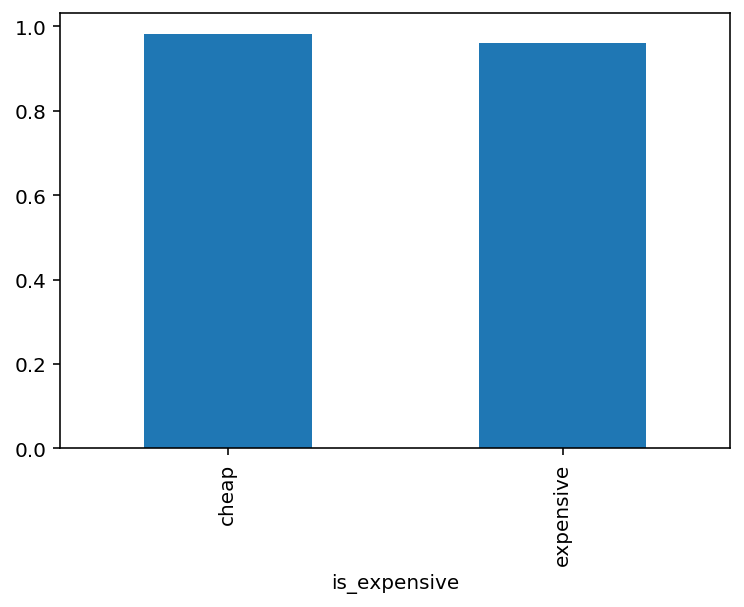

In [243]:
#draw a plot to see the difference
(results.groupby('is_expensive')
    .apply(lambda x: metrics.accuracy_score(x.tag, x.prediction))
    .plot(kind='bar'))

Then we do a 500-shuffled permutation test to see whether the difference is by chance

In [218]:
obs = results.groupby('is_expensive').apply(lambda x: metrics.accuracy_score(x.tag, x.prediction)).diff().iloc[-1]

metrs = []
for _ in range(500):
    s = (
        results[['is_expensive', 'prediction', 'tag']]
        .assign(is_expensive=results.is_expensive.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('is_expensive')
        .apply(lambda x: metrics.accuracy_score(x.tag, x.prediction))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)


The p-value is 0.78, so we fail to reject our null hypothesis

0.784


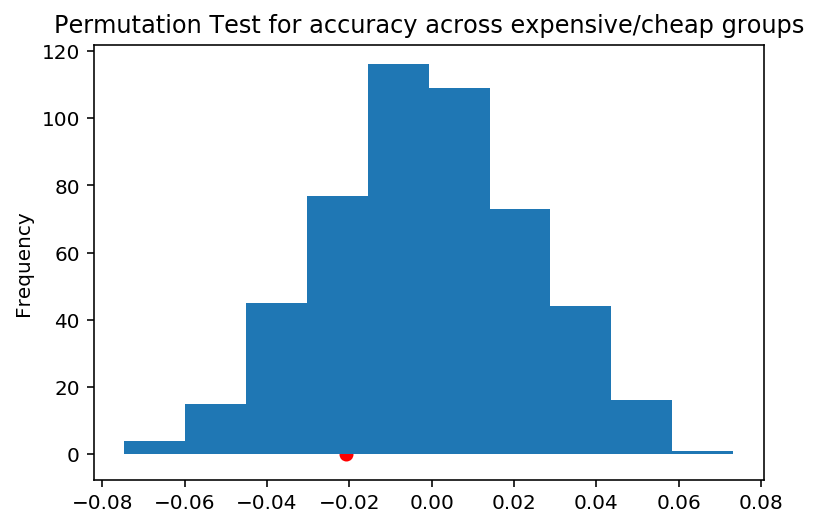

In [219]:
print(pd.Series(metrs >= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test for accuracy across expensive/cheap groups')
plt.scatter(obs, 0, c='r');